In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Pokemon = pd.read_csv('Pokemon.csv')
Pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [3]:
Pokemon['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [4]:
Pokemon['Type 2'].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [5]:
Pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [6]:
Pokemon['A/D Ratio'] = Pokemon['Attack']/Pokemon['Defense']


In [7]:
Pokemon[Pokemon['A/D Ratio']==Pokemon['A/D Ratio'].max()]


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,9.0


In [8]:
Pokemon[Pokemon['A/D Ratio']==Pokemon['A/D Ratio'].min()]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,A/D Ratio
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,0.043478


In [23]:

def typing(row):
    
    if row['Type 2']=='':
        return ['Type 1']
    else: 
        return ['Type 1']+'-'+['Type 2']





In [24]:
Pokemon['Combo Type'] = Pokemon.apply(typing, axis=1)
Pokemon.head(10)

TypeError: can only concatenate list (not "str") to list

In [41]:
Pokemon["A/D Ratio"].nlargest(5)


429    9.000
347    4.500
19     3.750
453    3.125
348    3.000
Name: A/D Ratio, dtype: float64

In [42]:
Pokemon.groupby(['Combo Type']).agg({Pokemon.mean()}).reset_index()

KeyError: 'Combo Type'

In [43]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib inline
from statistics import mode
from collections import Counter
from seaborn import load_dataset
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [44]:
Pokemon.isna().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
A/D Ratio       0
dtype: int64

In [45]:
Pokemon=Pokemon.dropna()

In [46]:
Pokemon.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
A/D Ratio     0
dtype: int64

In [47]:
def correlation_graphics(corr_gr):
    corr_gr = correlations_matrix = Pokemon.corr()
    sns.heatmap(correlations_matrix, annot=True)
    plt.show()
    return corr_gr

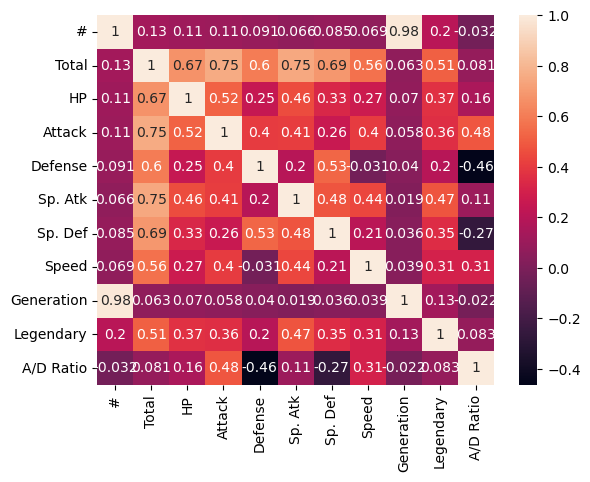

In [48]:
correlation=correlation_graphics(Pokemon)

In [49]:
def normalized(norm):
    norm = y = Pokemon['Total']
    norm = X = Pokemon.drop(['Total'], axis=1)
    norm = X_num = X.select_dtypes(include = np.number)
    norm = X_cat = X.select_dtypes(include = object)
    norm = transformer = MinMaxScaler().fit(X_num)
    norm = x_normalized = transformer.transform(X_num)
    norm = pd.DataFrame(x_normalized, columns=X_num.columns).corr()
    return norm

In [51]:
Normalized = display(normalized(Pokemon))



,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,A/D Ratio
#,1.000000,0.109955,0.105918,0.090547,0.065748,0.084785,0.068507,0.983625,-0.032394
HP,0.109955,1.000000,0.518707,0.248920,0.456355,0.328665,0.271853,0.069728,0.158666
Attack,0.105918,0.518707,1.000000,0.401001,0.408570,0.257964,0.403546,0.058433,0.482874
Defense,0.090547,0.248920,0.401001,1.000000,0.196778,0.528286,-0.030993,0.040160,-0.462351
Sp. Atk,0.065748,0.456355,0.408570,0.196778,1.000000,0.480027,0.435450,0.018942,0.106246
Sp. Def,0.084785,0.328665,0.257964,0.528286,0.480027,1.000000,0.208259,0.036356,-0.265646
Speed,0.068507,0.271853,0.403546,-0.030993,0.435450,0.208259,1.000000,0.039029,0.306325
Generation,0.983625,0.069728,0.058433,0.040160,0.018942,0.036356,0.039029,1.000000,-0.021843
A/D Ratio,-0.032394,0.158666,0.482874,-0.462351,0.106246,-0.265646,0.306325,-0.021843,1.000000


In [75]:
Orders = pd.read_csv('Orders.csv')
Orders.head(10)


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
5,5,536365,22752,2010,12,3,8,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30
6,6,536365,21730,2010,12,3,8,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50
7,7,536366,22633,2010,12,3,8,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
8,8,536366,22632,2010,12,3,8,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10
9,9,536367,84879,2010,12,3,8,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08


In [76]:
Orders.shape

(397924, 14)

In [62]:
labels = ["normal", "Preferred Customer", "VIP"]
bins = pd.cut(Orders['amount_spent'],3, labels=labels)
Orders['Binnedamount_spent'] = pd.cut(Orders['amount_spent'], 3, labels = labels)
bins.value_counts()


normal                397922
Preferred Customer         1
VIP                        1
Name: amount_spent, dtype: int64

In [63]:
Orders['amount_spent'].mean()

22.39474850474768

In [64]:
Orders[Orders['amount_spent']==Orders['amount_spent'].max()]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Binnedamount_spent
397451,540421,581483,23843,2011,12,5,9,"paper craft , little birdie",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,VIP


In [77]:
Orders['amount_spent'].nlargest(10)


397451    168469.60
37126      77183.60
155418     38970.00
118352      8142.75
248706      7144.72
32732       6539.40
109624      6539.40
308097      4992.00
32730       4921.50
109620      4632.00
Name: amount_spent, dtype: float64

In [80]:
print(Orders['amount_spent'].min())
display(Orders['amount_spent'].max())
print('size of bins = ', (Orders['amount_spent'].max()-Orders['amount_spent'].min())/5)
display(Orders[Orders['amount_spent']<33693.92+0].shape)
display(Orders[Orders['amount_spent']>168469.6-33693.92].shape)

0.0


168469.6

size of bins =  33693.92


(397921, 14)

(1, 14)

In [91]:
labels = ["normal", "Preferred Customer", "VIP"]
bins = pd.cut(Orders['amount_spent'],[-1,50,10000,200000], labels = labels)
bins.value_counts(dropna=False)

normal                370996
Preferred Customer     26925
VIP                        3
Name: amount_spent, dtype: int64

In [113]:
def Clasification(row):
      
    if (row['amount_spent']>-1)&(row['amount_spent']<50):
        return 'Normal'
    elif (row['amount_spent']>=50)&(row['amount_spent']<10000):
        return 'Preferred Customer'
    else:
        return 'VIP'

In [114]:
Orders['Clasification'] = Orders.apply(Clasification, axis=1)
Orders.head(10)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Clasification
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Normal
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Normal
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Normal
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Normal
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Normal
5,5,536365,22752,2010,12,3,8,set 7 babushka nesting boxes,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,Normal
6,6,536365,21730,2010,12,3,8,glass star frosted t-light holder,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,Normal
7,7,536366,22633,2010,12,3,8,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,Normal
8,8,536366,22632,2010,12,3,8,hand warmer red polka dot,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,11.10,Normal
9,9,536367,84879,2010,12,3,8,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,54.08,Preferred Customer


In [115]:
display(Orders.groupby(['Clasification','Country']).agg({'amount_spent':max}))

amount_spent
Clasification      Country                           
Normal             Australia                    49.92
                   Austria                      49.80
                   Bahrain                      39.80
                   Belgium                      49.80
                   Brazil                       49.50
...                                               ...
Preferred Customer USA                          81.36
                   United Arab Emirates        153.00
                   United Kingdom             8142.75
                   Unspecified                  69.36
VIP                United Kingdom           168469.60

[73 rows x 1 columns]

In [119]:
Orders[Orders['Clasification']=='VIP']


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Clasification
37126,61619,541431,23166,2011,1,2,10,medium ceramic top storage jar,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom,77183.6,VIP
155418,222680,556444,22502,2011,6,5,15,picnic basket wicker 60 pieces,60,2011-06-10 15:28:00,649.50,15098,United Kingdom,38970.0,VIP
397451,540421,581483,23843,2011,12,5,9,"paper craft , little birdie",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,168469.6,VIP


In [122]:
Orders[(Orders['Clasification']=='VIP')& (Orders['Clasification']=='Preferred Customer')]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,Clasification
